In [174]:
import pandas as pd
from matplotlib import pyplot as plt
mv_pp = pd.read_csv('/home/jovyan/data1030/data1030-oscars-prediction-project/data/preprocessed_movies.csv')
mv = pd.read_csv('/home/jovyan/data1030/data1030-oscars-prediction-project/data/movies.csv')
mv_pp.shape

(1235, 1017)

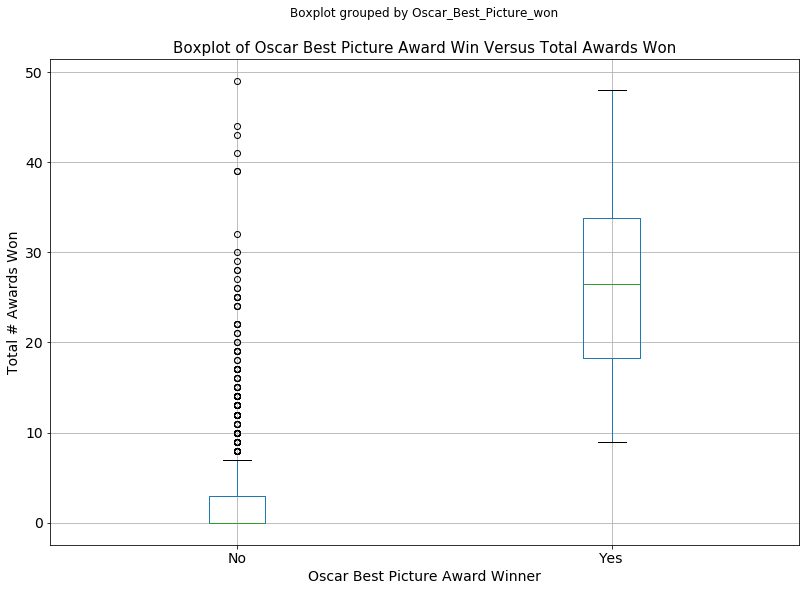

In [49]:
# Visualization 1: effect on Academy awards best picture based on awards won and awards nominated
# type(mv[mv['Oscar_Best_Picture_won'] == "Yes"].sort_values(by="year"))
mv[['Oscar_Best_Picture_won', 'awards_wins']].boxplot(by='Oscar_Best_Picture_won', figsize= (13,9), fontsize=14)
plt.title("Boxplot of Oscar Best Picture Award Win Versus Total Awards Won", fontdict= {'fontsize': 15})
plt.ylabel("Total # Awards Won", fontsize = 14)
plt.xlabel("Oscar Best Picture Award Winner", fontsize = 14)
plt.show()

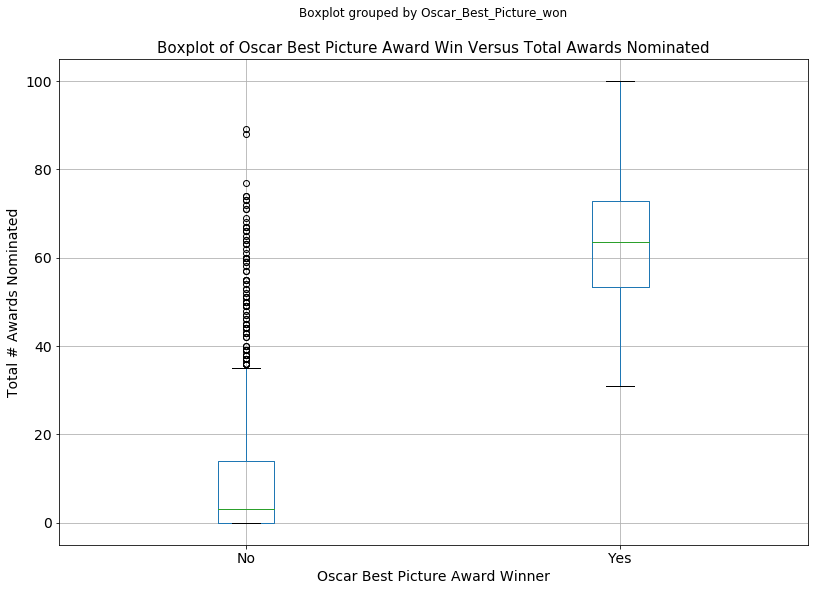

In [47]:
mv[['Oscar_Best_Picture_won', 'awards_nominations']].boxplot(by='Oscar_Best_Picture_won', figsize= (13,9), fontsize=14)
plt.title("Boxplot of Oscar Best Picture Award Win Versus Total Awards Nominated", fontdict= {'fontsize': 15})
plt.ylabel("Total # Awards Nominated", fontsize = 14)
plt.xlabel("Oscar Best Picture Award Winner", fontsize = 14)
plt.show()

In [175]:
award_results = {'Golden Globes': 64.4, 'BAFTA': 21.7, 'Screen Actors Guild':14, 'Critics Choice': 46.5, "Directors Guild": 7.58, "Producers Guild": 6.16, "Art Directors Guild:": 6.76, "Writers Guild":8.22,"Costume Designers Guild": 2, "Online Film Television Association": 46.4,"Online Film Critics Society":10.2, "Peoples Choice": 24.8, "London Critics Circle Film": 6.82,"American Cinema Editors":4.23, "Hollywood Film": 311, "Austin Film Critics Association": 2.88,"Denver Film Critics Society":1.63, "Boston Society of Film Critics":3.91, "New York Film Critics Circle": 7.74, "Los Angeles Film Critics Association":5.69 }
import operator

sorted_awards = sorted(awards.items(), key=operator.itemgetter(1))
len(sorted_awards)

20

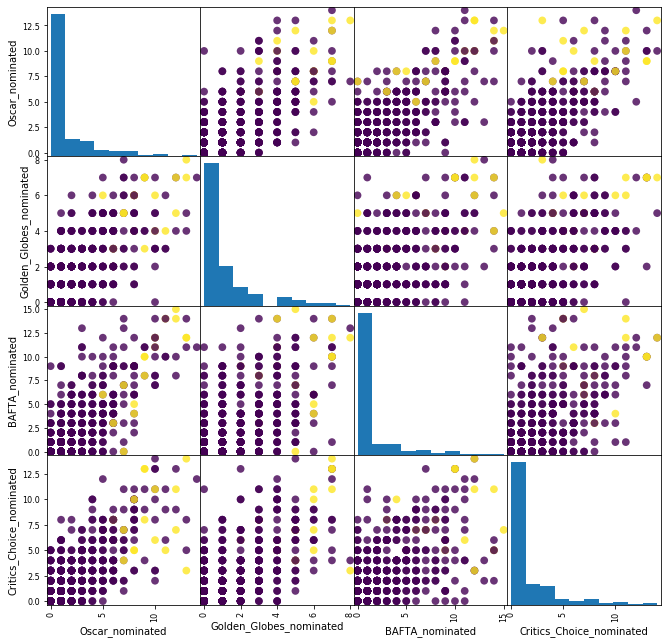

In [72]:
label = 'Oscar_Best_Picture_won' 
film_awards = ['Golden_Globes_nominated', 'BAFTA_nominated', 'Screen_Actors_Guild_nominated', 'Critics_Choice_nominated', 'Directors_Guild_nominated', 'Producers_Guild_nominated', 'Art_Directors_Guild_nominated', 'Writers_Guild_nominated', 'Costume_Designers_Guild_nominated', 'Online_Film_Television_Association_nominated', 'Online_Film_Critics_Society_nominated', 'People_Choice_nominated', 'London_Critics_Circle_Film_nominated', 'American_Cinema_Editors_nominated', 'Hollywood_Film_nominated', 'Austin_Film_Critics_Association_nominated','Denver_Film_Critics_Society_nominated', 'Boston_Society_of_Film_Critics_nominated', 'New_York_Film_Critics_Circle_nominated','Los_Angeles_Film_Critics_Association_nominated']
select_film_awards = ['Oscar_nominated','Golden_Globes_nominated', 'BAFTA_nominated', 'Critics_Choice_nominated',]

pd.plotting.scatter_matrix(mv[select_film_awards],c = mv_pp[label], figsize=(11, 11), marker='o', s=60, alpha=.8)
plt.show()

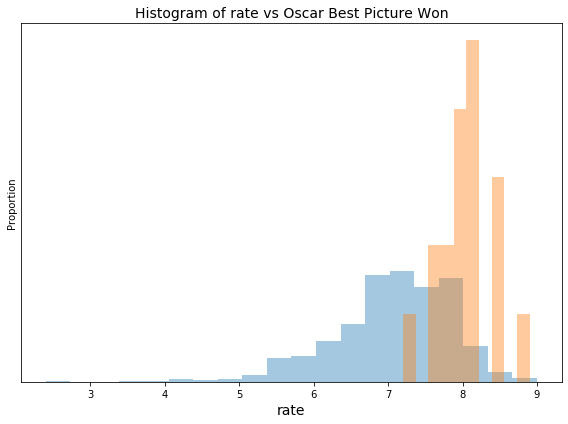

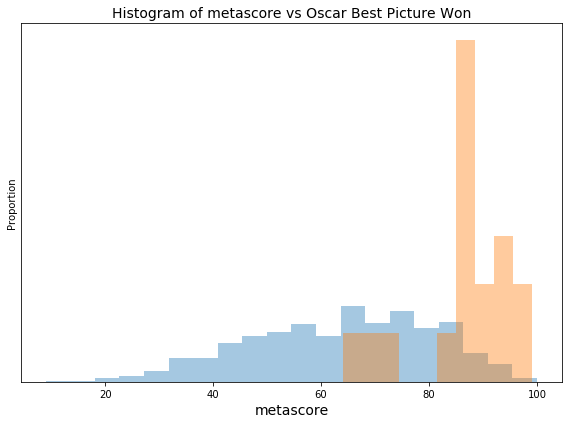

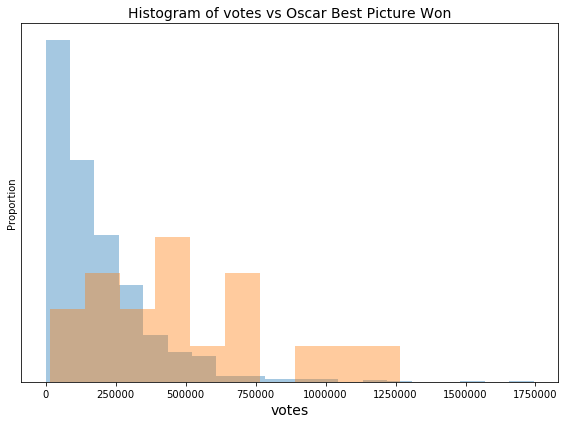

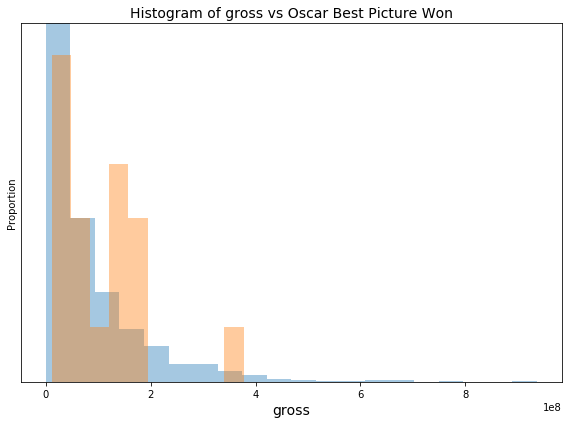

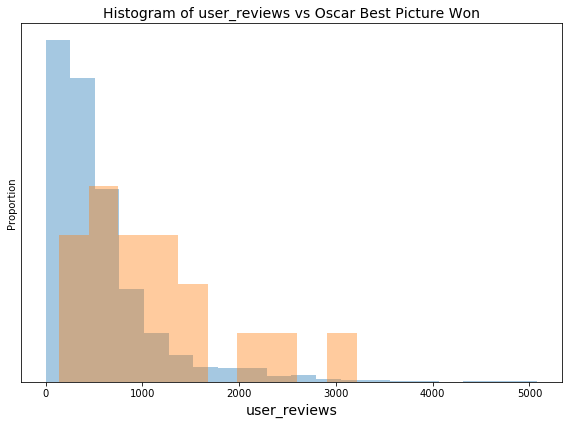

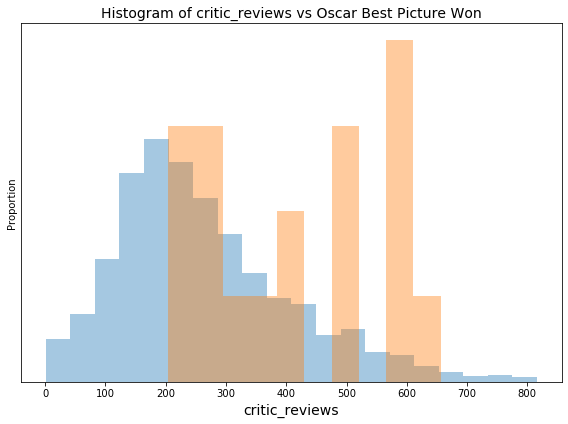

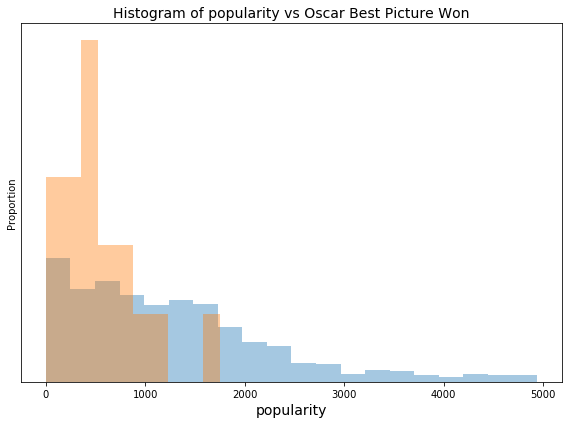

In [173]:
target = 'Oscar_Best_Picture_won' 
mv_pp_loss = mv_pp[mv_pp[target] == 0]
mv_pp_won = mv_pp[mv_pp[target] == 1]
mv_loss = mv[mv[target] == 'No']
mv_won = mv[mv[target] == 'Yes']

cts = ['rate','metascore','votes','gross','user_reviews','critic_reviews','popularity']
for col in cts:
#     col = 'gross'
    plt.figure(figsize= (8,6))
    #     bin_range = (mv[col].min(),mv[col].max())
    plt.hist(mv_loss[col],alpha=0.4,label= "Oscar Best Picture Won", bins=20, density = True)
    plt.hist(mv_won[col],alpha=0.4,label= "Oscar Best Picture Not Won", density = True)
    plt.xlabel(col, fontsize = 14)
    plt.yticks(ticks=[])
    plt.ylabel('Proportion')
    plt.title('Histogram of '+ col+ ' vs Oscar Best Picture Won', fontsize = 14)
    plt.tight_layout()
    plt.show()

In [95]:
mv_loss = mv[mv[label] == 'No']
mv_loss['rate']

0       6.4
1       7.0
2       5.7
3       7.4
4       8.8
       ... 
1230    8.1
1231    7.5
1232    8.1
1233    6.4
1234    7.3
Name: rate, Length: 1217, dtype: float64

Oscar_Best_Picture_nominated        No       Yes
release_date.month                              
1.0                           0.770492  0.229508
2.0                           0.923913  0.076087
3.0                           0.967391  0.032609
4.0                           1.000000  0.000000
5.0                           0.949495  0.050505
6.0                           0.967742  0.032258
7.0                           0.922222  0.077778
8.0                           0.921348  0.078652
9.0                           0.973333  0.026667
10.0                          0.863158  0.136842
11.0                          0.824427  0.175573
12.0                          0.796053  0.203947


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


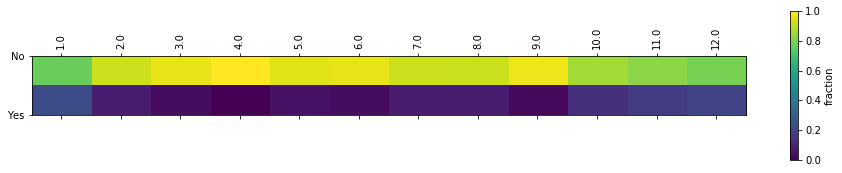

In [192]:
import numpy as np
count_matrix = mv.groupby(['release_date.month', 'Oscar_Best_Picture_nominated']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0).fillna(0)
print(count_matrix_norm)
plt.matshow(count_matrix_norm.T,vmin=0,vmax=1)
plt.xticks(np.arange(count_matrix_norm.shape[0]),count_matrix_norm.index,rotation=90)
plt.yticks(np.arange(count_matrix_norm.shape[1]),count_matrix_norm.columns)
plt.colorbar(label='fraction')
plt.tight_layout()
plt.show()

In [201]:
mv[mv[label]=='Yes']['release_date.month'].unique()

array([12.,  5.,  1., 10., 11.,  7.])

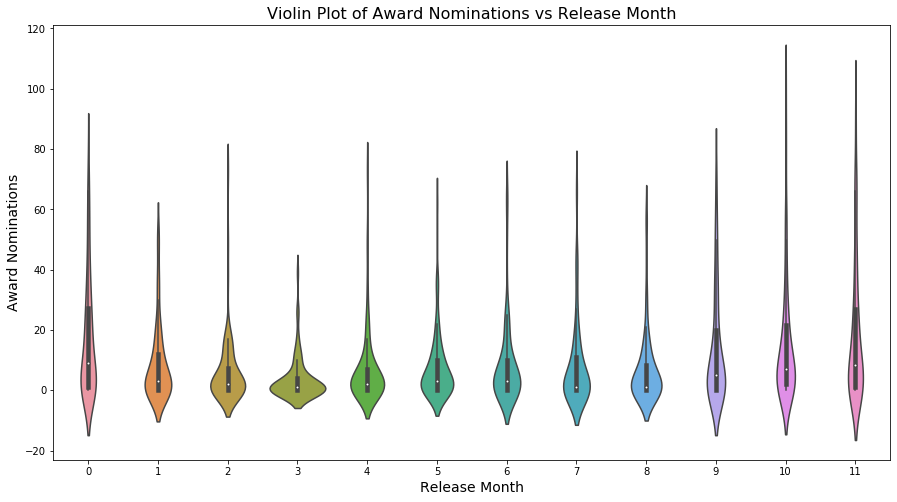

In [240]:
import seaborn as sns
dataset = [mv[mv['release_date.month']==x]['awards_nominations'].values for x in range(1,13)]
plt.figure(figsize=(15,8))
# plt.violinplot(dataset = dataset)
# plt.xticks(labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Award Nominations',fontsize=14)
plt.xlabel("Release Month", fontsize=14)
plt.title("Violin Plot of Award Nominations vs Release Month", fontsize=16)
# plt.show()
ax = sns.violinplot(data = dataset)

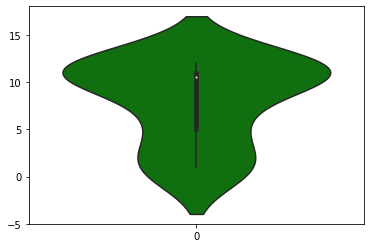

In [205]:
dataset = mv[mv[label]=='Yes']['release_date.month'].values
ax = sns.violinplot(data = dataset, color='green')

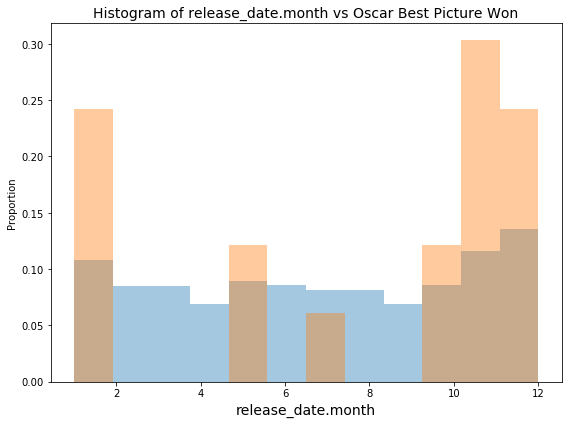

In [210]:
col = 'release_date.month'
plt.figure(figsize= (8,6))
#     bin_range = (mv[col].min(),mv[col].max())
plt.hist(mv_loss[col],alpha=0.4,label= "Oscar Best Picture Won", bins=12, density = True)
plt.hist(mv_won[col],alpha=0.4,label= "Oscar Best Picture Not Won",bins=12,density = True)
plt.xlabel(col, fontsize = 14)
# plt.yticks(ticks=[])
plt.ylabel('Proportion')
plt.title('Histogram of '+ col+ ' vs Oscar Best Picture Won', fontsize = 14)
plt.tight_layout()
plt.show()

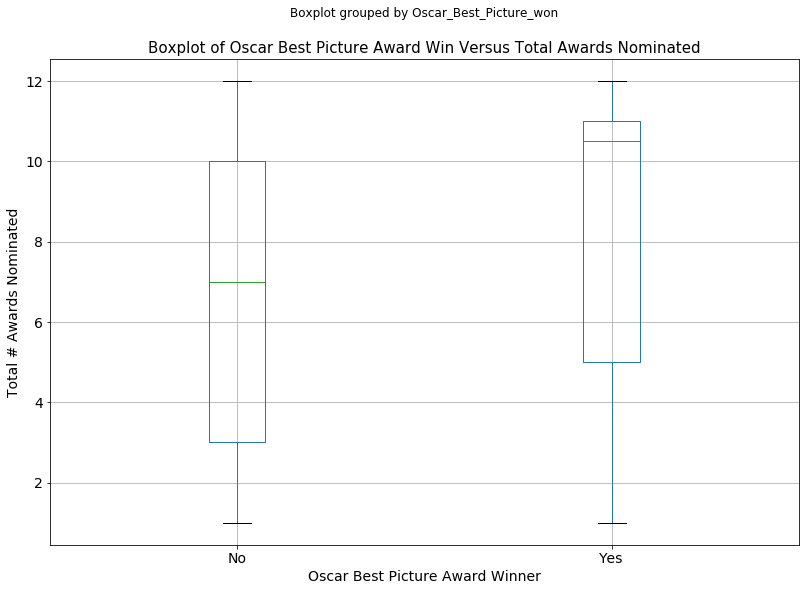

In [211]:
mv[['Oscar_Best_Picture_won', col]].boxplot(by='Oscar_Best_Picture_won', figsize= (13,9), fontsize=14)
plt.title("Boxplot of Oscar Best Picture Award Win Versus Total Awards Nominated", fontdict= {'fontsize': 15})
plt.ylabel("Total # Awards Nominated", fontsize = 14)
plt.xlabel("Oscar Best Picture Award Winner", fontsize = 14)
plt.show()